In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [6]:
bias = 100
X, y, coef = make_regression(n_features=1, noise=10, bias=bias, random_state=42, coef=True)

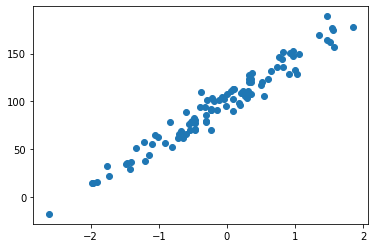

In [7]:
plt.scatter(X, y)

In [8]:
X.shape , y.shape

((100, 1), (100,))

In [10]:
coef , bias

(array(41.74110031), 100)

In [11]:
y_gen = X * coef + bias

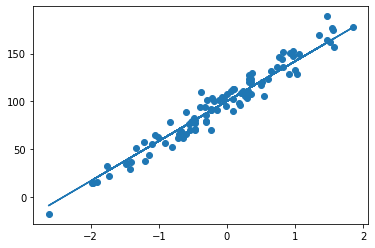

In [13]:
plt.scatter(X, y)
plt.plot(X,y_gen)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

In [16]:
model.fit(X,y)

LinearRegression()

In [17]:
model.coef_, model.intercept_

(array([44.43716999]), 101.16511532052698)

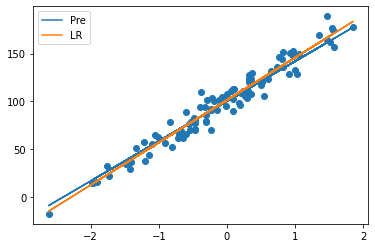

In [18]:
plt.scatter(X, y)
plt.plot(X, y_gen, label="Pre")
plt.plot(X, model.predict(X), label="LR")
plt.legend()

## custom Linear regression

In [19]:
class LinearRegCustom:
    # constructor
    def __init__(self, lr=0.1):
        self.lr = lr
    
    # training function i.e. fit
    def fit(self, X, y):
        self._X = X # _X mock behavior like private
        self._y = y.reshape(-1, 1) # do calculations, else it will give error due to some numpy shape
        
        # need to figure out value of coef & intercept
        # step 1: pick these values at random 
        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()
        
        # gradient descent
        errors = []
        
        # lets say we do this 50 times
        for i in range(50):
            self.gradient_decend()
            errors.append(self.error())
        return errors
    
    def gradient_decend(self):
        # change in coef and intercept
        d_coef, d_intercept = self.gradient()
        self.coef_ -= d_coef * self.lr
        self.intercept_ -= d_intercept * self.lr
    
    def gradient(self):
        yh = self.predict(self._X) # from predict funtion
        
        d_coef = ((yh - self._y) * self._X).mean()
        d_intercept = (yh - self._y).mean()
        
        return d_coef, d_intercept
    
    def predict(self, X):
        return X * self.coef_ + self.intercept_
    
    def error(self):
        return ((self.predict(self._X) - self._y) ** 2).sum()

In [20]:
model = LinearRegCustom(lr = .1)

In [21]:
errors = model.fit(X, y)

In [22]:
class LinearRegCustom:
    # constructor
    def __init__(self, lr=0.1):
        self.lr = lr
    
    # training function i.e. fit
    def fit(self, X, y):
        self._X = X # _X mock behavior like private
        self._y = y.reshape(-1, 1) # do calculations, else it will give error due to some numpy shape
        
        # need to figure out value of coef & intercept
        # step 1: pick these values at random 
        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()
        
        # gradient descent
        errors = []
        
        # lets say we do this 50 times
        for i in range(50):
            self.gradient_decend()
            errors.append(self.error())
        return errors
    
    def gradient_decend(self):
        # change in coef and intercept
        d_coef, d_intercept = self.gradient()
        self.coef_ -= d_coef * self.lr
        self.intercept_ -= d_intercept * self.lr
    
    def gradient(self):
        yh = self.predict(self._X) # from predict funtion
        
        d_coef = ((yh - self._y) * self._X).mean()
        d_intercept = (yh - self._y).mean()
        
        return d_coef, d_intercept
    
    def predict(self, X):
        return X * self.coef_ + self.intercept_
    
    def error(self):
        return ((self.predict(self._X) - self._y) ** 2).sum()

(43.25331499286381, 100.29506260901412)

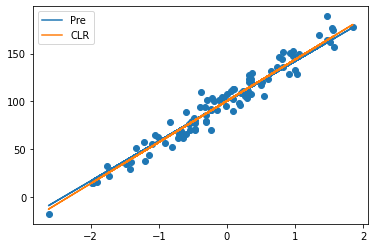

In [23]:
plt.scatter(X, y)
plt.plot(X, y_gen, label="Pre")
plt.plot(X, model.predict(X), label="CLR")
plt.legend()

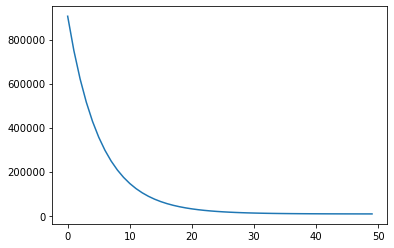

In [24]:
plt.plot(errors)

In [48]:
# for i in range(1, 10):
#     model = LinearRegCustom(lr=.5 * i)
#     errors = model.fit(X, y)
    
#     plt.figure()
    
#     plt.title(str(.5 * i))
#     plt.plot(errors)

## Housing problem

In [139]:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split

In [140]:
X, y = load_boston(return_X_y=True)

In [141]:
boston = load_boston()

In [142]:
# print(boston.DESCR)

In [143]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [144]:
# plt.scatter(X_train , y_train)

In [145]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [146]:
model.coef_, model.intercept_

(array([-1.28749718e-01,  3.78232228e-02,  5.82109233e-02,  3.23866812e+00,
        -1.61698120e+01,  3.90205116e+00, -1.28507825e-02, -1.42222430e+00,
         2.34853915e-01, -8.21331947e-03, -9.28722459e-01,  1.17695921e-02,
        -5.47566338e-01]),
 33.33497575563571)

In [147]:
# plt.scatter(x_train, y_train)
# # plt.plot(X, y_gen, label="Pre")
# plt.plot(X_train, model.predict(x_test), label="LR",)
# plt.legend()

In [148]:
y_test[:5]

array([23.6, 32.4, 13.6, 22.8, 16.1])

In [149]:
model.predict(X_test[:5])

array([28.53469469, 36.6187006 , 15.63751079, 25.5014496 , 18.7096734 ])

In [150]:
X_test[:1]

array([[9.1780e-02, 0.0000e+00, 4.0500e+00, 0.0000e+00, 5.1000e-01,
        6.4160e+00, 8.4100e+01, 2.6463e+00, 5.0000e+00, 2.9600e+02,
        1.6600e+01, 3.9550e+02, 9.0400e+00]])

In [151]:
model.score(X_test,y_test)

0.7261570836552471

## Salary Dataset

In [152]:
dataset = pd.read_csv("Salary_Data.csv")

In [153]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [154]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

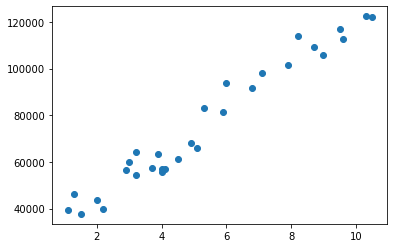

In [156]:
plt.scatter(X,y)

In [157]:
model = LinearRegression()

In [158]:
model.fit(X_train, y_train)

LinearRegression()

In [159]:
model.predict(X_test[:5])

array([115814.30756236,  71511.92534771, 102617.85328566,  75282.34085534,
        55487.65944028])

In [66]:
y_test[:5]

array([112635.,  67938., 113812.,  83088.,  64445.])

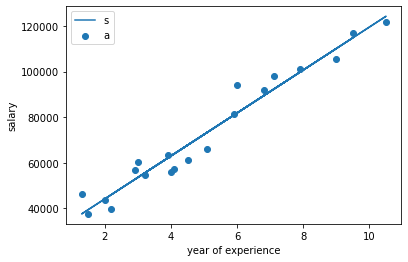

In [168]:
plt.scatter(X_train,y_train)
plt.plot(X_train,model.predict(X_train))
plt.xlabel("year of experience")
plt.ylabel("salary")
plt.legend(labels = "salary-year")


In [170]:
model.score(X_test, y_test)

0.9553063138044949

In [176]:
yrs = int(input("How many yrs of experience do you have: "))
sal = model.predict(np.array([yrs]).reshape(-1,1))
print("\nYour estimated salary is $", round(sal[0], 3))

How many yrs of experience do you have:  5



Your estimated salary is $ 72454.529


In [173]:
sal = model.predict(np.array([yrs]).reshape(-1, 1))

In [174]:
sal

array([72454.52922462])